# Estatística básica


#Importações

In [ ]:
#importações:
import numpy as np

In [ ]:
#importações:
import pandas as pd

In [ ]:
#importações:
from scipy.stats import chi2_contingency

# Biblioteca Panda

In [ ]:
lista_idades = [26,30,32,22,26,35,40,20,43,31,23,100]

In [ ]:
np.sum(lista_idades)

np.int64(428)

In [ ]:
len(lista_idades)

12

In [ ]:
np.sum(lista_idades)/len(lista_idades)

np.float64(35.666666666666664)

In [ ]:
np.mean(lista_idades)

np.float64(35.666666666666664)

In [ ]:
media = np.mean(lista_idades)
print("media aritimetica =", media)

media aritimetica = 35.666666666666664


Idades em ordem = .sort()

In [ ]:
lista_idades.sort()
lista_idades

[20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43, 100]

In [ ]:
mediana = np.median(lista_idades)
mediana

np.float64(30.5)

In [ ]:
dados = pd.read_excel('/content/drive/MyDrive/Programaria/Exercicios Programaria.xlsx')

# Média
- média é a soma de todos os valores dividida pelo total de valores
- sensível a valores extremos (outliers) e é melhor para dados com distribuição normal

In [ ]:
dados['IDADE'].mean()

np.float64(31.169168453657374)

# Mediana
- valor do meio de um conjunto de dados ordenado
- é mais adequada para conjuntos de dados distorcidos ou com valores discrepantes

In [ ]:
dados['IDADE'].median()

30.0

# Moda = número que aparece mais vezes

In [ ]:
dados['IDADE'].mode()

,IDADE
0,27.0


# Desvio Padrão = informa se os dados são próximos (baixo desvio-padrão) ou distantes (alto desvio-padrão) da média.

In [ ]:
dados['IDADE'].std()

6.902802832143141

In [ ]:
dados['IDADE'].min()

18.0

In [ ]:
dados['IDADE'].max()

54.0

In [ ]:
dados[dados['GENERO']=='Feminino']['IDADE'].mean()


np.float64(31.318051575931232)

In [ ]:
dados[dados['GENERO']=='Masculino']['IDADE'].mean()

np.float64(31.147876077930373)

# Valores Faltantes

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   ID                                                                                                                         4271 non-null   object 
 1   IDADE                                                                                                                      4197 non-null   float64
 2   FAIXA IDADE                                                                                                                4271 non-null   object 
 3   GENERO                                                                                                                     4262 

In [ ]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [ ]:
dados["GENERO"].fillna("Prefiro não informar")

,GENERO
0,Masculino
1,Masculino
2,Masculino
3,Masculino
4,Feminino
...,...
4266,Masculino
4267,Feminino
4268,Masculino
4269,Masculino


In [ ]:
dados["GENERO"] = dados["GENERO"].fillna("Prefiro não informar")

In [ ]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,21


# Trabalhando coluna de idade
False = linha preenchida
True = linha vazia

In [ ]:
dados['IDADE'].isnull()

,IDADE
0,False
1,False
2,False
3,False
4,False
...,...
4266,False
4267,False
4268,False
4269,True


In [ ]:
dados['IDADE'].isnull().value_counts()

,count
IDADE,
False,4197
True,74


In [ ]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'PREJUDICA?',
       'ASPECTOS_PREJUDICADOS', 'VIVE_NO_BRASIL', 'ESTADO ONDE MORA',
       'UF ONDE MORA', 'REGIAO ONDE MORA', 'MUDOU DE ESTADO?',
       'REGIAO DE ORIGEM', 'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'COMPUTACAO?', 'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?'],
      dtype='object')

In [ ]:
dados[dados['IDADE'].isnull()]["FAIXA IDADE"].value_counts()

,count
FAIXA IDADE,
55+,68
17-21,6


In [ ]:
dados[dados['IDADE'].isnull()]["FAIXA IDADE"].value_counts()

,count
FAIXA IDADE,
55+,68
17-21,6


In [ ]:
dados[dados['FAIXA IDADE']=='55+']['IDADE']

,IDADE
9,NaN
66,NaN
96,NaN
121,NaN
156,NaN
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [ ]:
dados[dados['FAIXA IDADE']=='55+']['NIVEL']

,NIVEL
9,Pleno
66,Júnior
96,Pleno
121,Pleno
156,Júnior
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [ ]:
media_geral = dados['IDADE'].mean()
media_geral

np.float64(31.169168453657374)

In [ ]:
dados.loc[(dados['FAIXA IDADE']== '55+') & (dados['IDADE'].isnull()), 'IDADE'] = media_geral

In [ ]:
dados[dados['IDADE'].isnull()]["FAIXA IDADE"].value_counts()

,count
FAIXA IDADE,
17-21,6


# Exercicio | Faça você mesme | Tratando valores faltantes

In [ ]:
import pandas as pd

In [ ]:
base = pd.read_excel('/content/drive/MyDrive/Programaria/licitacoes.xlsx')

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15336 entries, 0 to 15335
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Número Licitação          15336 non-null  int64 
 1   Código UG                 15336 non-null  int64 
 2   Nome UG                   15336 non-null  object
 3   Código Modalidade Compra  15336 non-null  int64 
 4   Modalidade Compra         15336 non-null  object
 5   Número Processo           15336 non-null  object
 6   Objeto                    15336 non-null  object
 7   Situação Licitação        15336 non-null  object
 8   Código Órgão Superior     15336 non-null  int64 
 9   Nome Órgão Superior       15336 non-null  object
 10  Código Órgão              15336 non-null  int64 
 11  Nome Órgão                15336 non-null  object
 12  UF                        15336 non-null  object
 13  Município                 15336 non-null  object
 14  Data Resultado Compra 

> Identifique qual coluna possui valores faltantes
- 15  Data Abertura  4688 non-null  object

> Identifique o tipo de dados desta coluna
- Esta coluna tem objetos ou seja palavras.


> Substitua os valores faltantes pelo mesmo formato

*com a possibilidade de substituir por datas inexistentes.

In [ ]:
base["Data Abertura"].fillna("00/00/0000")

,Data Abertura
0,17/08/2016
1,00/00/0000
2,00/00/0000
3,30/11/2018
4,00/00/0000
...,...
15331,26/11/2018
15332,00/00/0000
15333,00/00/0000
15334,00/00/0000


# Valores Discrepantes - Outliers

In [ ]:
lista_idades = [26,30,32,22,26,35,400,20,43,31,23]

In [ ]:
import numpy as np

In [ ]:
media = np.mean(lista_idades)
media

np.float64(62.54545454545455)

In [ ]:
desvio = np.std(lista_idades)
desvio

np.float64(106.89532997398872)

In [ ]:
media+3*desvio

np.float64(383.2314444674207)

In [ ]:
media-3*desvio

np.float64(-258.1405353765116)

In [ ]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7b77c899e8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b77c899df40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b77c8b72420>],
 'medians': [<matplotlib.lines.Line2D at 0x7b77c899e090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b77c899eb70>],
 'means': []}

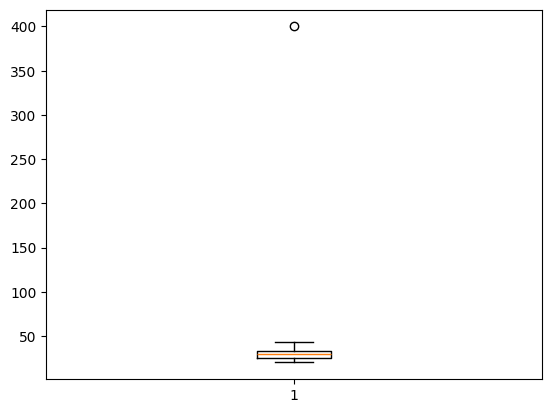

In [ ]:
plt.boxplot(lista_idades)

# Distribuição amostral e intervalo de confiança

In [ ]:
dados = pd.read_excel('/content/drive/MyDrive/Programaria/Exercicios Programaria.xlsx')

In [ ]:
idades = dados['IDADE']
idades

,IDADE
0,39.0
1,32.0
2,53.0
3,27.0
4,46.0
...,...
4266,26.0
4267,30.0
4268,29.0
4269,NaN


In [ ]:
media_amostral = np.mean(idades)
media_amostral

np.float64(31.169168453657374)

In [ ]:
desvio_padrao = np.std(idades)
desvio_padrao

6.901980433518415

In [ ]:
nivel_confianca = 0.95

In [ ]:
tamanho_amostra = len(idades)
tamanho_amostra

4271

# erro padrão = diferença entre as médias

In [ ]:
from scipy import stats

In [ ]:
erro_padrao = stats.sem(idades)
erro_padrao

np.float64(nan)

In [ ]:
intervalo_confianca = stats.t.interval(nivel_confianca, tamanho_amostra-1, loc=media_amostral, scale=erro_padrao)
intervalo_confianca

(np.float64(nan), np.float64(nan))

# 4.5 - Featuring engineering: criando novas variáveis para facilitar a análise (parte 1)

In [ ]:
def preencher_nivel(gestor,nivel):
  if gestor == 1:
    return "Pessoa Gestora"
  else:
    return nivel

In [ ]:
dados['NOVO NIVEL'] = dados.apply(lambda x: preencher_nivel(x['GESTOR?'], x['NIVEL']), axis=1)
dados['NOVO NIVEL']

,NOVO NIVEL
0,Júnior
1,Pessoa Gestora
2,Pleno
3,Sênior
4,Pleno
...,...
4266,Pleno
4267,Pleno
4268,Pessoa Gestora
4269,Júnior


In [ ]:
dados['NOVO NIVEL'].value_counts()

,count
NOVO NIVEL,
Pleno,1060
Júnior,1023
Sênior,898
Pessoa Gestora,713


In [ ]:
dados['NIVEL']

,NIVEL
0,Júnior
1,NaN
2,Pleno
3,Sênior
4,Pleno
...,...
4266,Pleno
4267,Pleno
4268,NaN
4269,Júnior


In [ ]:
dados = pd.get_dummies(dados, columns=['NIVEL'])

In [ ]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'PREJUDICA?',
       'ASPECTOS_PREJUDICADOS', 'VIVE_NO_BRASIL', 'ESTADO ONDE MORA',
       'UF ONDE MORA', 'REGIAO ONDE MORA', 'MUDOU DE ESTADO?',
       'REGIAO DE ORIGEM', 'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'COMPUTACAO?', 'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'NOVO NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior'],
      dtype='object')

In [ ]:
def determinar_geracao(idade):
  if 39<idade<=58:
    return "Geracao X"
  elif 29<idade<=39:
    return "Millenial"
  elif 13<idade<=29:
    return "Geracao Z"
  else:
    return "Outra Geracao"

In [ ]:
dados['GERACAO'] = dados['IDADE'].apply(determinar_geracao)

In [ ]:
dados['GERACAO'].value_counts()

,count
GERACAO,
Geracao Z,1993
Millenial,1693
Geracao X,511
Outra Geracao,74


In [ ]:
dados2 = pd.read_excel('/content/drive/MyDrive/Programaria/Planilha_Aula_parte2.xlsx')

In [ ]:
dados2.head()

,ID,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,de 1 a 2 anos,de 7 a 10 anos,True,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL
1,zzls2oftfn9law393oezzls2ofhvfpzd,de 3 a 4 anos,Menos de 1 ano,False,Falta de oportunidade de crescimento no empreg...,"Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,de 3 a 4 anos,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,Não tenho experiência na área de dados,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL


In [ ]:
dados = dados.merge(dados2, on='ID', how='left')

In [ ]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'PREJUDICA?',
       'ASPECTOS_PREJUDICADOS', 'VIVE_NO_BRASIL', 'ESTADO ONDE MORA',
       'UF ONDE MORA', 'REGIAO ONDE MORA', 'MUDOU DE ESTADO?',
       'REGIAO DE ORIGEM', 'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'COMPUTACAO?', 'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'NOVO NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior', 'GERACAO',
       'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está s

In [ ]:
dados['Você pretende mudar de emprego nos próximos 6 meses?'].value_counts()

,count
Você pretende mudar de emprego nos próximos 6 meses?,
"Não estou buscando, mas me considero aberto a outras oportunidades",1354
Estou em busca de oportunidades dentro ou fora do Brasil,1011
Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses,978
"Estou em busca de oportunidades, mas apenas fora do Brasil",353


In [ ]:
dados['EM_BUSCA'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('em busca', case=False)

In [ ]:
dados['EM_BUSCA'].value_counts()

,count
EM_BUSCA,
False,2332
True,1364


In [ ]:
dados['Aberto_oportunidades'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('aberto', case=False)

In [ ]:
dados['Aberto_oportunidades'].value_counts()

,count
Aberto_oportunidades,
False,2342
True,1354


In [ ]:
dados['racas'] = dados['COR/RACA/ETNIA'].str.contains('branca', case=False)

In [ ]:
dados['racas'].value_counts()

,count
racas,
True,2746
False,1527


# Correlação

In [ ]:
def cramer_coeficiente(coluna1, coluna2):
  tabela_cruzada = np.array(pd.crosstab(coluna1,coluna2))
  chi2 = chi2_contingency(tabela_cruzada)[0]
  soma = np.sum(tabela_cruzada)
  mini = min(tabela_cruzada.shape)-1
  cramer = np.sqrt(chi2/(soma*mini))
  return cramer


In [ ]:
cramer_coeficiente(dados['COR/RACA/ETNIA'], dados['NIVEL DE ENSINO'])

np.float64(0.04499106580480143)

In [ ]:
tabela_cruzada = pd.crosstab(dados['COR/RACA/ETNIA'],dados['NIVEL DE ENSINO'])
tabela_cruzada

NIVEL DE ENSINO,Doutorado ou Phd,Estudante de Graduação,Graduação/Bacharelado,Mestrado,Não tenho graduação formal,Prefiro não informar,Pós-graduação
COR/RACA/ETNIA,,,,,,,
Amarela,7,15,50,14,2,0,40
Branca,127,365,999,355,65,8,827
Indígena,0,2,4,2,0,0,3
Outra,0,0,6,3,1,0,7
Parda,50,178,333,113,33,3,344
Prefiro não informar,1,2,14,1,0,1,7
Preta,6,51,104,33,9,0,88


In [ ]:
np.array(tabela_cruzada)

array([[  7,  15,  50,  14,   2,   0,  40],
       [127, 365, 999, 355,  65,   8, 827],
       [  0,   2,   4,   2,   0,   0,   3],
       [  0,   0,   6,   3,   1,   0,   7],
       [ 50, 178, 333, 113,  33,   3, 344],
       [  1,   2,  14,   1,   0,   1,   7],
       [  6,  51, 104,  33,   9,   0,  88]])

Exercicio correlação: ensino e gênero

In [ ]:
correlacao_continua = dados['NIVEL DE ENSINO'].corr(dados['GENERO'])
correlacao_continua

ValueError: could not convert string to float: 'Pós-graduação'

In [ ]:
cramer_coeficiente(dados['NIVEL DE ENSINO'], dados['GENERO'])

np.float64(0.08522666596077663)

In [ ]:
dados.to_csv('/content/drive/MyDrive/Programaria/analise_dados_modulo_4.csv', index=False)